In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
from collections import Counter
from ar_wordcloud import ArabicWordCloud
from bidi.algorithm import get_display
import arabic_reshaper
from nltk.util import ngrams


import re, html, unicodedata ,string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet


from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer 
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers


[nltk_data] Downloading package punkt to /Users/zahraa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/zahraa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zahraa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zahraa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#the dirctory that contains all csv data 
csv_dir = "archive"
# Get a list of all stories CSV files in the directory
csv_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir) if "stories" in f ]

In [3]:
csv_files

['archive/stories_tamazight.csv',
 'archive/stories_politique.csv',
 'archive/stories_regions.csv',
 'archive/stories_economie.csv',
 'archive/stories_marocains-du-monde.csv',
 'archive/stories_art-et-culture.csv',
 'archive/stories_faits-divers.csv',
 'archive/stories_societe.csv',
 'archive/stories_medias.csv',
 'archive/stories_sport.csv',
 'archive/stories_orbites.csv']

In [4]:
#read each file as dataframe and store it in a list
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)
# Concatenate the dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)

df.head() # Print the first few rows

Unnamed: 0                                id  \
0           0  9de52a46055311eb8949646e69d991ea   
1           1  9ee74b02055311ebb757646e69d991ea   
2           2  9fed7812055311eb9158646e69d991ea   
3           3  a0e39038055311eb8f78646e69d991ea   
4           4  a1d90814055311eb879e646e69d991ea   

                                               title  \
0  وزارة التربية: لا تغيير في الغلاف الزمني للأما...   
1        "تغييب" تدريس الأمازيغية يغضب نقابات بتزنيت   
2        مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة   
3           نص امتحان موحد يثير حنق فعاليات أمازيغية   
4   "عادل تيزنيت" يتحف المغاربة بالموسيقى الأمازيغية   

                            date                 author  \
0   السبت 03 أكتوبر 2020 - 00:02       هسبريس من الرباط   
1  الاثنين 28 شتنبر 2020 - 09:13  رشيد بيجيكن من أكادير   
2  الاثنين 28 شتنبر 2020 - 00:41       هسبريس من الرباط   
3    السبت 26 شتنبر 2020 - 17:28      هسبريس من الرّباط   
4    السبت 26 شتنبر 2020 - 15:50       هسبريس من الرباط   

                                               story      topic  
0  قالت وزارة التربية الوطنية والتكوين المهني وال...  tamazight  
1  طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...  tamazight  
2  أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...  tamazight  
3  سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...  tamazight  
4  من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...  tamazight

In [5]:
#drop unwanted column 
df = df.drop('Unnamed: 0', axis=1)


In [26]:
df.to_csv('allstories.csv', index=False)

In [6]:
#check after dropping
df.head()

id  \
0  9de52a46055311eb8949646e69d991ea   
1  9ee74b02055311ebb757646e69d991ea   
2  9fed7812055311eb9158646e69d991ea   
3  a0e39038055311eb8f78646e69d991ea   
4  a1d90814055311eb879e646e69d991ea   

                                               title  \
0  وزارة التربية: لا تغيير في الغلاف الزمني للأما...   
1        "تغييب" تدريس الأمازيغية يغضب نقابات بتزنيت   
2        مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة   
3           نص امتحان موحد يثير حنق فعاليات أمازيغية   
4   "عادل تيزنيت" يتحف المغاربة بالموسيقى الأمازيغية   

                            date                 author  \
0   السبت 03 أكتوبر 2020 - 00:02       هسبريس من الرباط   
1  الاثنين 28 شتنبر 2020 - 09:13  رشيد بيجيكن من أكادير   
2  الاثنين 28 شتنبر 2020 - 00:41       هسبريس من الرباط   
3    السبت 26 شتنبر 2020 - 17:28      هسبريس من الرّباط   
4    السبت 26 شتنبر 2020 - 15:50       هسبريس من الرباط   

                                               story      topic  
0  قالت وزارة التربية الوطنية والتكوين المهني وال...  tamazight  
1  طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...  tamazight  
2  أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...  tamazight  
3  سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...  tamazight  
4  من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...  tamazight

In [7]:
df["story"].values[1]

'طالبت الكتابة الإقليمية للجامعة الوطنية للتعليم -التوجه الديمقراطي- بتزنيت المدير الإقليمي لوزارة التربية الوطنية بضرورة عقد اجتماع عاجل للجنة الإقليمية للتتبع والتشاور، قصد البت في مجموعة من القضايا ذات الصبغة الآنية، ضمنها ما وصفتها مراسلة للتنظيم النقابي، تتوفر عليها هسبريس، بـ"الأوضاع الخطيرة التي تهدد الدخول المدرسي الحالي".ومما ركّزت عليه المراسلة "إقدام المديرية الإقليمية على حذف مادة اللغة الأمازيغية من جدول الحصص الأسبوعية بسلك التعليم الابتدائي، وطلبها من مديري المؤسسات التعليمية تعميم استعمالات زمن معيبة، وهو ما يشكل خرقا للفصل الخامس من الدستور ولمقتضيات القانون التنظيمي رقم 16.26 المتعلق بمراحل تفعيل الطابع الرسمي للغة الأمازيغية وكيفية إدماجها في مجال التعليم ومجالات الحياة العامة ذات الأولوية"، وفق التعبير الوارد فيها.عمر أوزكان، الكاتب الإداري للجامعة الوطنية للتعليم التوجه الديمقراطي بتزنيت، قال في تصريح لهسبريس إن "المفتش التربوي الذي ترأس لجنة إعداد استعمالات الزمن تعمد حذف مواد اللغة الأمازيغية من جدول الحصص الأسبوعية، بمباركة المدير الإقليمي، الذي طلب تعميمها رغم 

In [8]:
df.info() # data info no nulls ans all data in object form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 515.8+ KB


In [9]:
df.shape

(11000, 6)

In [10]:
df["topic"].unique() #the categries of the stories


array(['tamazight', 'politique', 'regions', 'economie',
       'marocains-du-monde', 'art-et-culture', 'faits-divers', 'societe',
       'medias', 'sport', 'orbites'], dtype=object)

In [11]:
len(df["topic"].unique())


11

In [12]:
df["topic"].value_counts()  #check data balance and it is perfectly balanced

tamazight             1000
politique             1000
regions               1000
economie              1000
marocains-du-monde    1000
art-et-culture        1000
faits-divers          1000
societe               1000
medias                1000
sport                 1000
orbites               1000
Name: topic, dtype: int64

<Axes: >

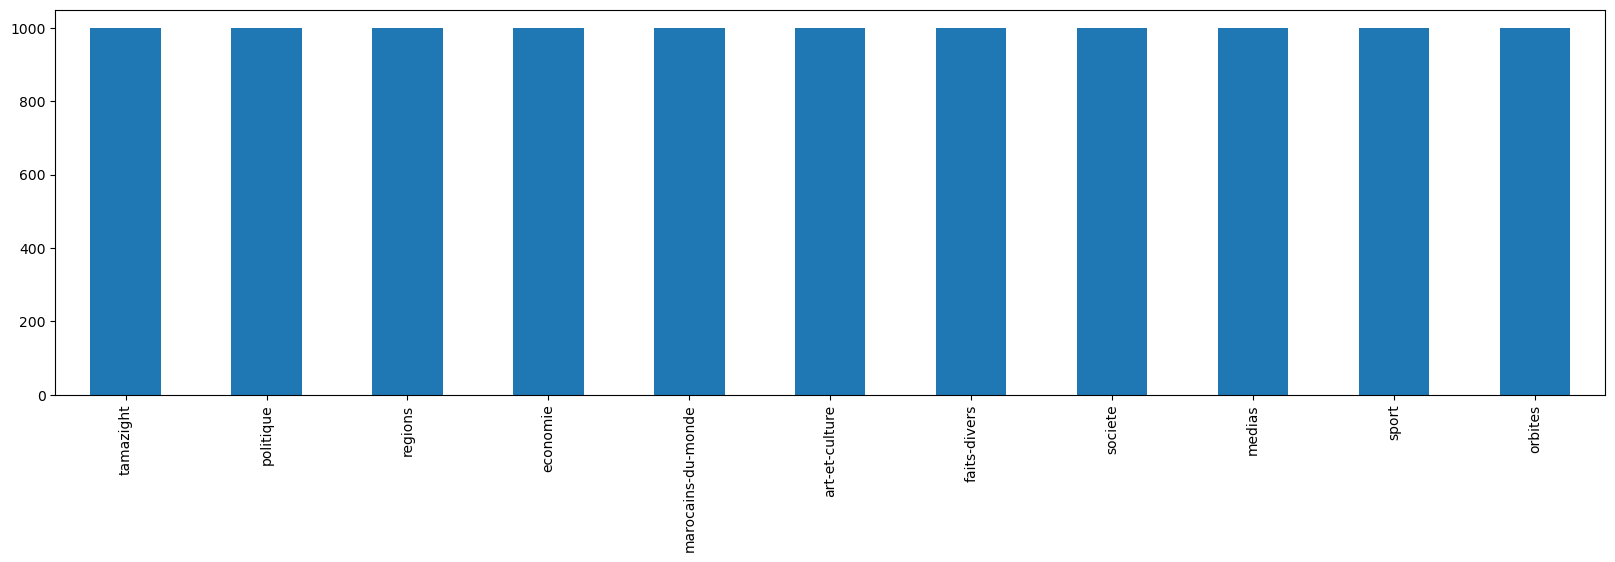

In [13]:
df["topic"].value_counts().plot(kind='bar', figsize=(20, 5))


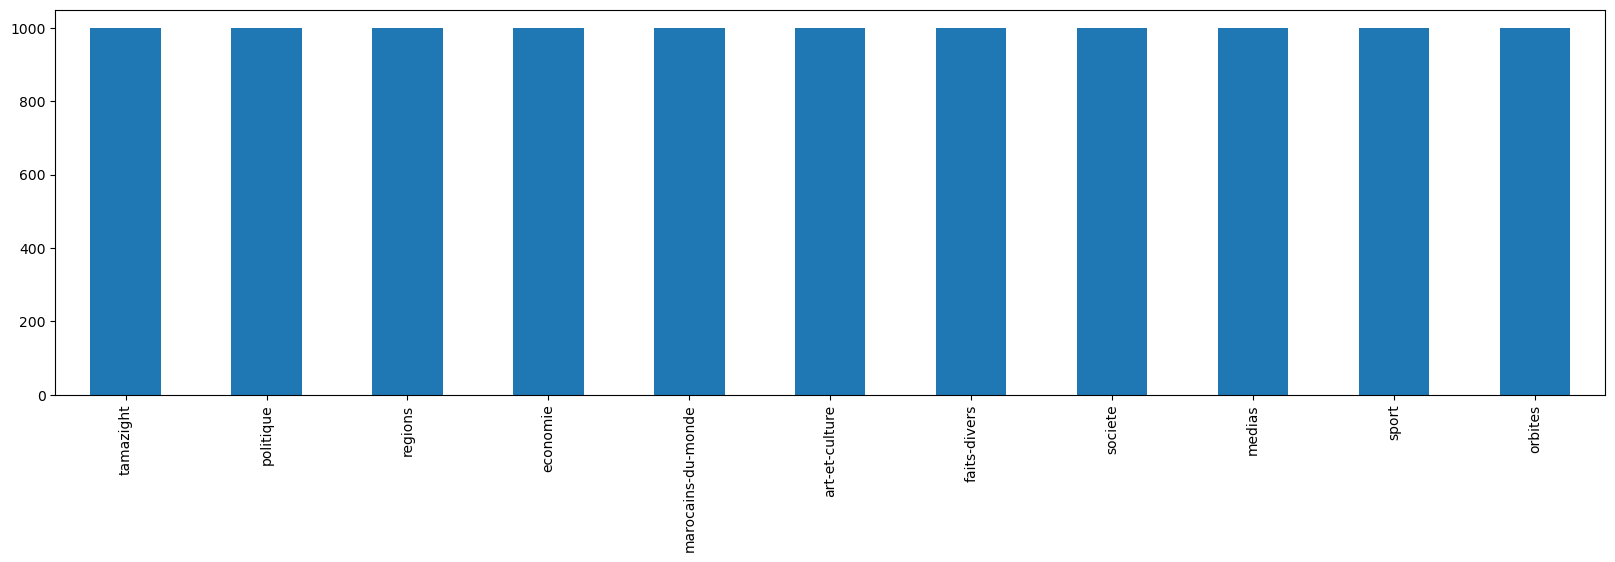

In [35]:
# your code to generate the plot
df["topic"].value_counts().plot(kind='bar', figsize=(20, 5))

# save the plot as a JPG image
plt.savefig("myplot.jpg", dpi=300, bbox_inches='tight')

In [14]:
#calculating words frequency across all topics and finding most frequent words

#get all text in list format
text_list = df['story'].tolist()

# Join the list of text into a single string
text = ' '.join(text_list)

# Tokenize the text into words
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

# Remove stop words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Find the most frequent word
most_frequent_word = word_counts.most_common(20)
#Print the most frequent word and its count
#print('The most frequent word is "{}" with a count of {}'.format(most_frequent_word, word_counts[most_frequent_word]))

In [27]:
#saving the words and their counts into csv 
dict_general={'word': word_counts.keys(), 'word_counts': word_counts.values()}

# Convert the word counts list to a pandas dataframe
word_counts_df = pd.DataFrame(dict_general)

# Save the word counts dataframe as a CSV file
word_counts_df.to_csv('word_counts.csv', index=False)

In [28]:
#check the  file
dfg=pd.read_csv('word_counts.csv')
dfg.sort_values(by=["word_counts"],ascending=False)

word  word_counts
295    المغربية         1776
314      المغرب         1679
7        المساء         1367
386        خلال         1358
226       اليوم         1234
...         ...          ...
39163      برية            1
39162    خنازير            1
39161     بتجول            1
17253       تور            1
60358      ليؤك            1

[60359 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

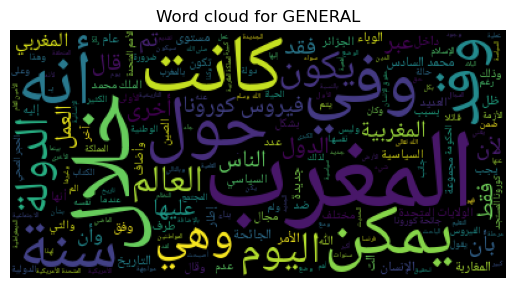

In [33]:
#visualize the fequant words using ArabicWordCloud

data = arabic_reshaper.reshape(' '.join(filtered_words))
data = get_display(data)
wordcloud = ArabicWordCloud().generate(data)

# Display the word cloud
plt.figure()
fig, ax = plt.subplots()

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word cloud for GENERAL")
plt.show()

In [34]:
fig.savefig(f"output/wordcloud/general_words.png")


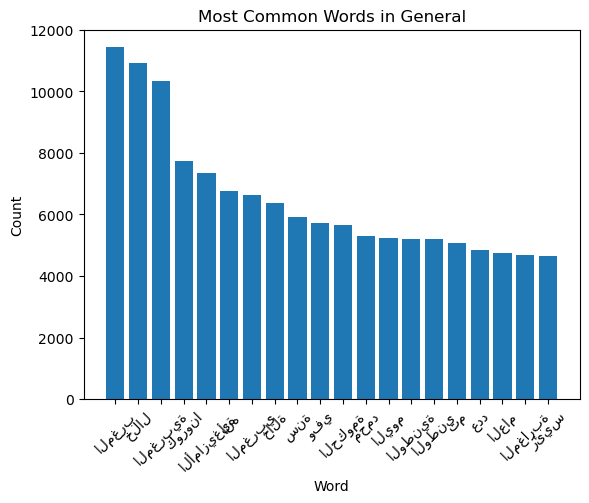

In [18]:
#visualize the frequant words using barchart

words = [word for word, count in most_frequent_word]
counts = [count for word, count in most_frequent_word]
plt.bar(words, counts)
plt.title("Most Common Words in General")
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
#calculate and visualize the most frequent words across each category

# Extract the text and category from the dataframe
text_list = df['story'].tolist()
category_list = df['topic'].tolist()

# Create a dictionary to store the most common word for each category
most_common_words = {}
dataframes_cat = []

# Loop over the categories and find the most common word for each category
for category in set(category_list):
    # Extract the text for the current category
    category_text = [text_list[i] for i in range(len(text_list)) if category_list[i] == category]
    
    # Join the text into a single string
    text = ' '.join(category_text)
    
    # Tokenize the text into words
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Count the frequency of each word
    word_counts = Counter(filtered_words)
    
    dict_cat={'word': word_counts.keys(), 'word_counts': word_counts.values()}
    df_cat = pd.DataFrame(dict_cat)
    df_cat["category"]= category
    dataframes_cat.append(df_cat)
    
    # Find the most frequent word
    most_frequent_word = word_counts.most_common(10)
    # Store the most common word for the current category in the dictionary
    most_common_words[category] = most_frequent_word

#  Print the 10 most common words for each category
for category, most_common_word_list in most_common_words.items():
    print('The 10 most common words in category "{}" are:'.format(category))
    for word, count in most_common_word_list:
        print('{} ({})'.format(word, count))

# Concatenate the dataframes into a single dataframe
df_count_category = pd.concat(dataframes_cat, ignore_index=True)
# Save the word counts dataframe as a CSV file
df_count_category.to_csv('word_counts_category.csv', index=False)

The 10 most common words in category "sport" are:
القدم (1340)
الفريق (1217)
المغربي (1068)
لكرة (1047)
الموسم (954)
الدوري (883)
اللاعب (843)
خلال (837)
كورونا (741)
نادي (669)
The 10 most common words in category "tamazight" are:
الأمازيغية (7064)
الأمازيغي (1724)
اللغة (1523)
المغرب (1229)
المغربية (1087)
القانون (1042)
سنة (1003)
الحكومة (929)
الأمازيغ (920)
خلال (877)
The 10 most common words in category "economie" are:
المائة (2067)
خلال (1602)
المغرب (1403)
كورونا (1099)
سنة (752)
الحكومة (721)
القطاع (717)
مليار (705)
المغربية (704)
الاقتصاد (693)
The 10 most common words in category "art-et-culture" are:
المغربي (1230)
المغربية (1003)
خلال (934)
المغرب (859)
محمد (820)
عبد (704)
الثقافة (631)
الت (619)
الفيلم (606)
العربية (603)
The 10 most common words in category "faits-divers" are:
العامة (1038)
عناصر (772)
النيابة (734)
المشتبه (650)
القضائية (638)
المختصة (615)
البحث (556)
تم (546)
الشرطة (489)
بمدينة (488)
The 10 most common words in category "orbites" are:
المغرب (1950)

In [20]:
df_count_category.head() # Print the first few rows


word  word_counts category
0       رغم          132    sport
1   المستوى           68    sport
2    التقني          203    sport
3     العام          154    sport
4  لمباريات           11    sport

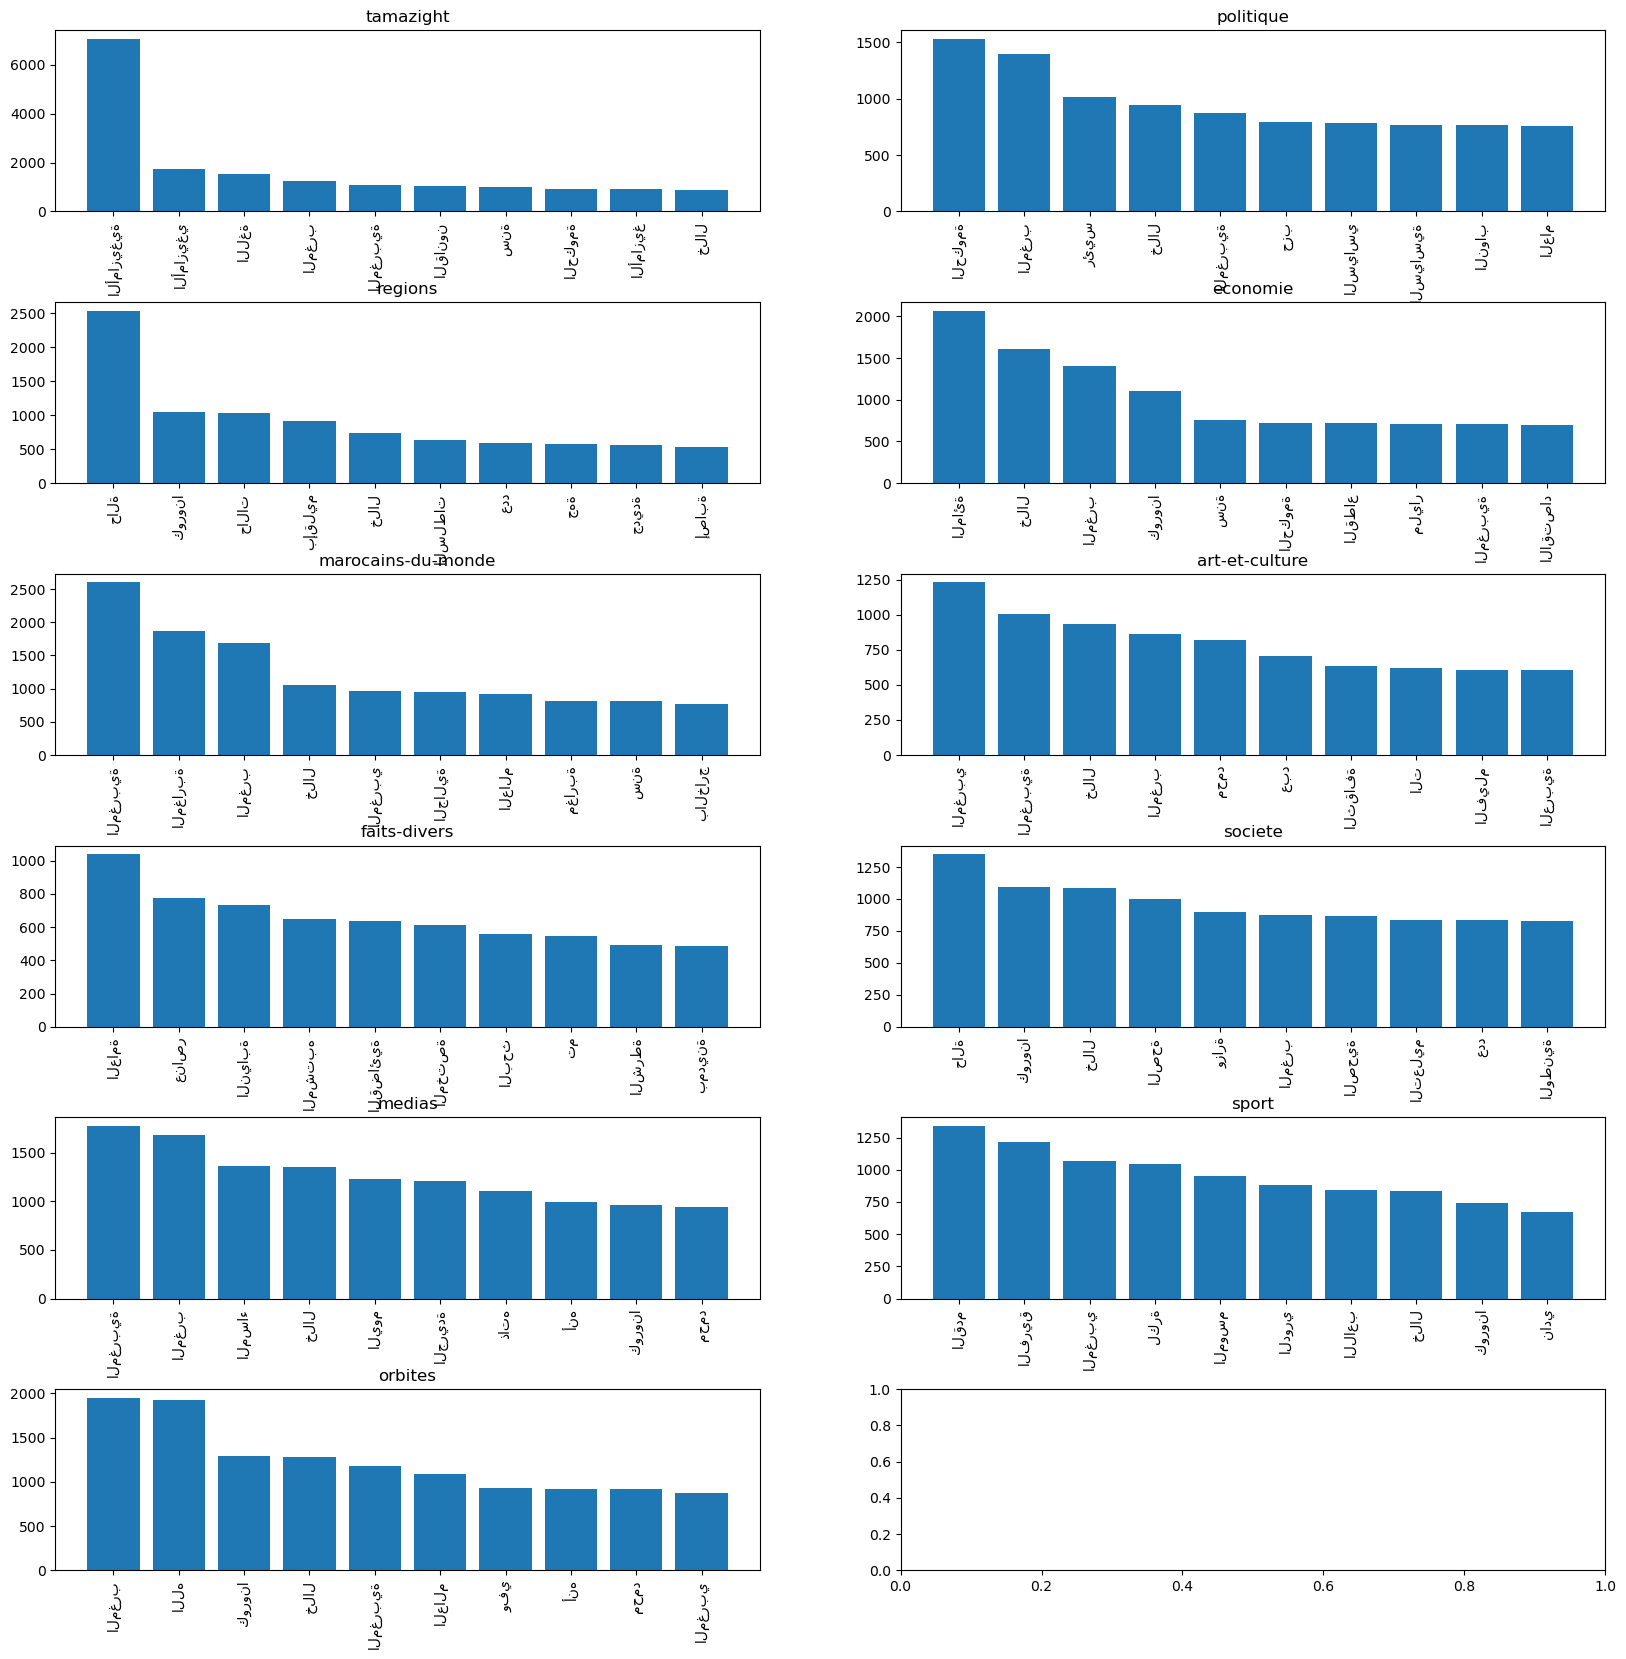

In [21]:
# Create a list of categories
categories = df['topic'].unique()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

# Loop over the categories and create a bar chart for each category
for i, category in enumerate(categories):
    # Get the text for the current category
    text = ' '.join(df[df['topic'] == category]['story'])
     # Tokenize the text into words
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    top_words = dict(Counter(filtered_words).most_common(10))
    
    # Create a bar chart of the top 5 words for the current category
    ax = axes[i//2, i%2]
    ax.bar(top_words.keys(), top_words.values())
    ax.set_title(category)
    ax.tick_params(axis='x', labelrotation=90)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

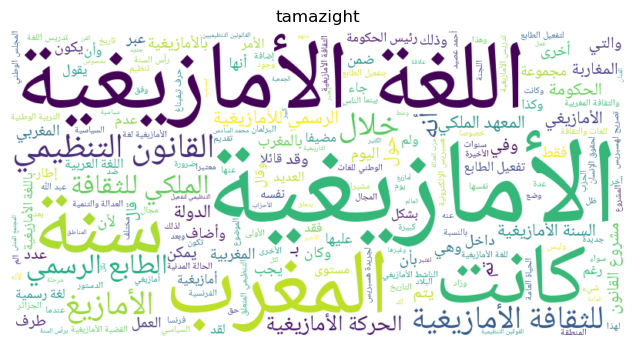

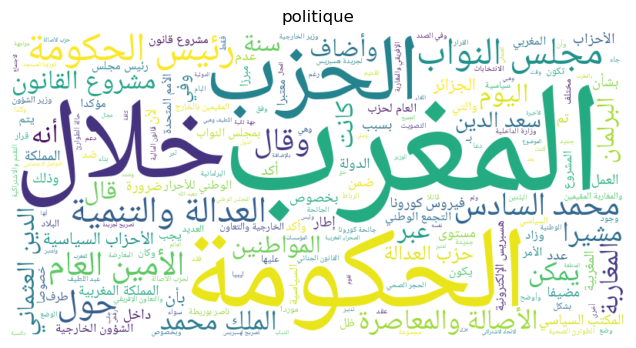

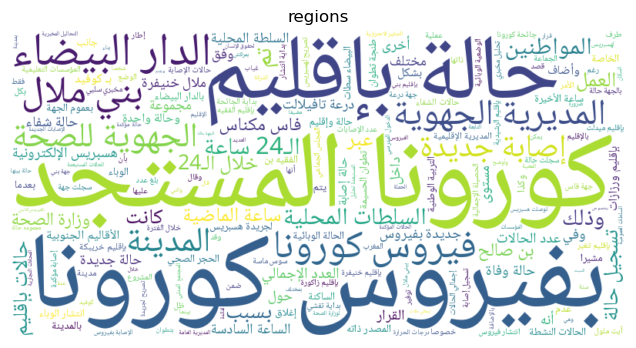

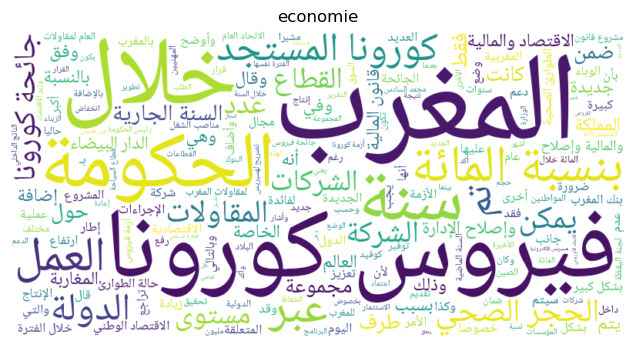

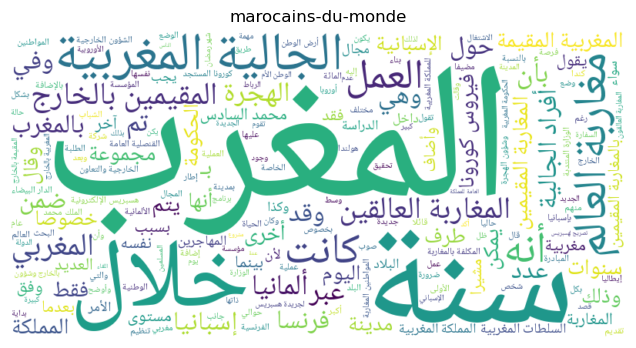

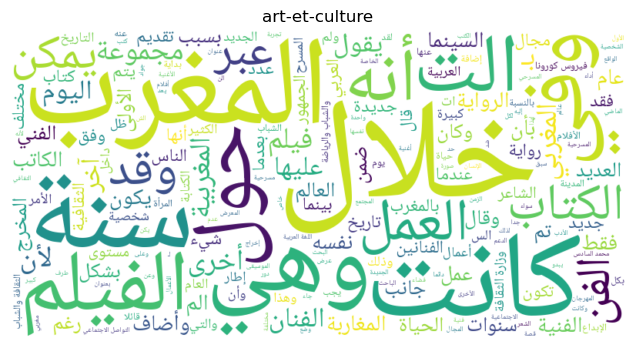

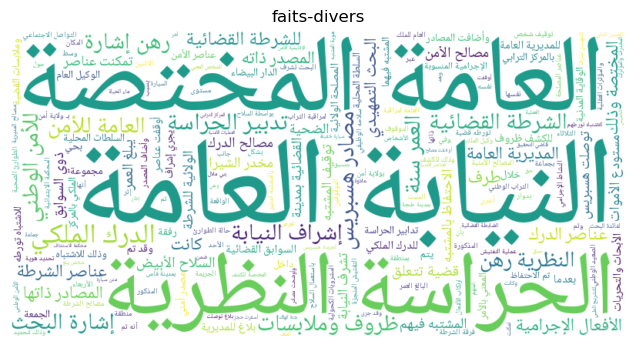

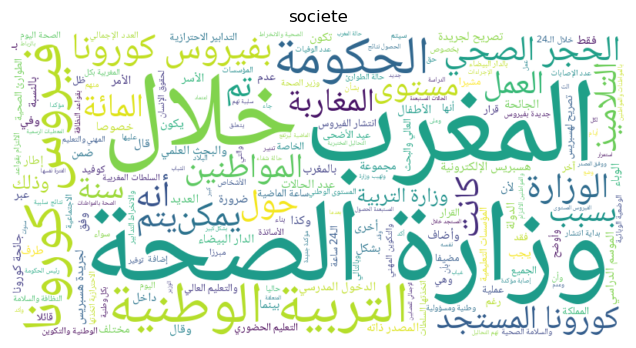

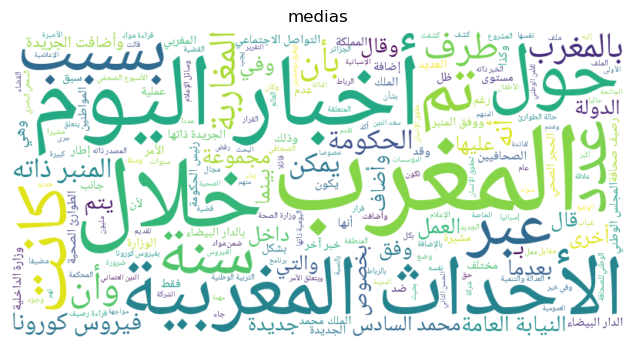

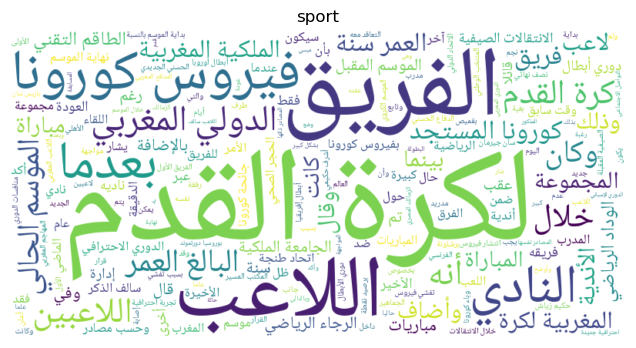

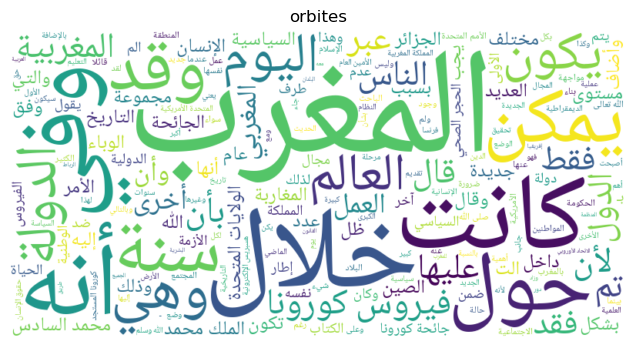

In [22]:
# Create a list of categories
categories = df['topic'].unique()

# Loop over the categories and create a word cloud for each category
for i, category in enumerate(categories):
    # Create a new figure object for each category
    fig, ax = plt.subplots(figsize=(8, 4))

    # Get the text for the current category
    text = ' '.join(df[df['topic'] == category]['story'])
    # Tokenize the text into words
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Reshape the Arabic text
    data = arabic_reshaper.reshape(' '.join(filtered_words))
    data = get_display(data)


    # Generate a word cloud and get the top 5 words
    wordcloud = ArabicWordCloud(width=800, height=400, background_color='white').generate(data)
    
    # Create a word cloud of the top 5 words for the current category
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(category)
    ax.axis('off')
    
    # Save the figure
    fig.savefig(f"output/wordcloud/{category}_wordcloud.png")

    # Close the figure
    #plt.close(fig)



In [23]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter


df['stories'] = df['story'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.isalpha() and word.lower() not in stop_words]))

# Generate n-grams from the preprocessed "stories" column
n = 3  # Specify the length of n-grams
df['ngrams_freq'] = df['story'].apply(lambda x: dict(Counter(ngrams(x.split(), n))))

# Sort the n-grams by frequency in descending order
df['top_ngrams'] = df['ngrams_freq'].apply(lambda x: sorted(x.items(), key=lambda item: item[1], reverse=True)[:10])

# Print the top n-grams for each row
for index, row in df.iterrows():
    print(f"Top {n}-grams for row {index}:")
    for ngram, freq in row['top_ngrams']:
        print(' '.join(ngram), freq)

Top 3-grams for row 0:
قالت وزارة التربية 1
وزارة التربية الوطنية 1
التربية الوطنية والتكوين 1
الوطنية والتكوين المهني 1
والتكوين المهني والتعليم 1
المهني والتعليم العالي 1
والتعليم العالي والبحث 1
العالي والبحث العلمي، 1
والبحث العلمي، قطاع 1
العلمي، قطاع التربية 1
Top 3-grams for row 1:
للجامعة الوطنية للتعليم 2
المدير الإقليمي لوزارة 2
الإقليمي لوزارة التربية 2
اللغة الأمازيغية من 2
الأمازيغية من جدول 2
من جدول الحصص 2
طالبت الكتابة الإقليمية 1
الكتابة الإقليمية للجامعة 1
الإقليمية للجامعة الوطنية 1
الوطنية للتعليم -التوجه 1
Top 3-grams for row 2:
مدير مدرسة "السمارة" 2
أفاد المرصد الأمازيغي 1
المرصد الأمازيغي للحقوق 1
الأمازيغي للحقوق والحريات 1
للحقوق والحريات أنه 1
والحريات أنه توصل 1
أنه توصل بمعطيات 1
توصل بمعطيات تفيد 1
بمعطيات تفيد بأن 1
تفيد بأن أستاذة 1
Top 3-grams for row 3:
سجلت فعاليات مدنية 1
فعاليات مدنية أمازيغية 1
مدنية أمازيغية عديدة 1
أمازيغية عديدة امتعاضها 1
عديدة امتعاضها من 1
امتعاضها من نص 1
من نص امتحان 1
نص امتحان في 1
امتحان في اللغة 1
في اللغة العربية 1
To

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:

# Preprocess the "stories" column
all_stories = ' '.join(df['story'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.isalpha() and word.lower() not in stop_words])))

# Generate n-grams from the preprocessed "stories" column
n = 3  # Specify the length of n-grams
ngram_freq = Counter(ngrams(all_stories.split(), n))

# Sort the n-grams by frequency in descending order
sorted_ngram_freq = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top n n-grams with the highest frequency
top_ngrams = sorted_ngram_freq[:10]

# Print the top n-grams
for ngram, freq in top_ngrams:
    print(' '.join(ngram), freq)

الملك محمد السادس 741
تصريح لجريدة هسبريس 638
المعهد الملكي للثقافة 401
فيروس كورونا المستجد 340
حالة الطوارئ الصحية 336
وزارة التربية الوطنية 332
الشؤون الخارجية والتعاون 324
حزب العدالة والتنمية 299
بفيروس كورونا المستجد 262
الاقتصاد والمالية وإصلاح 256


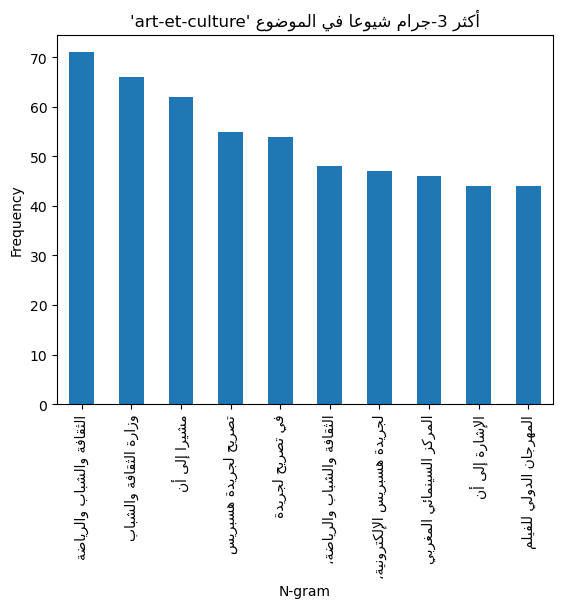

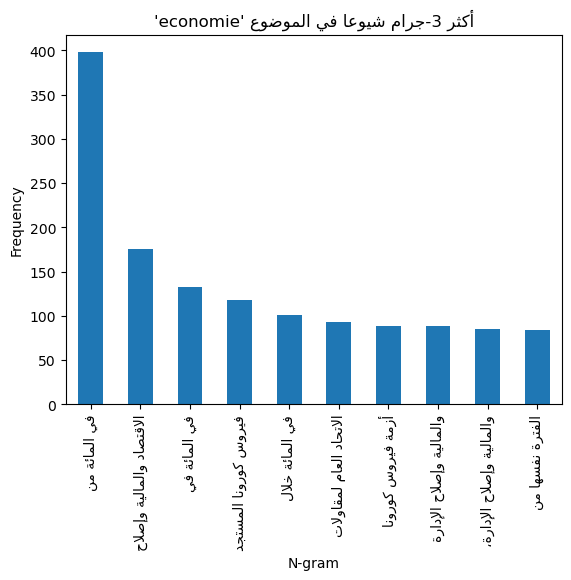

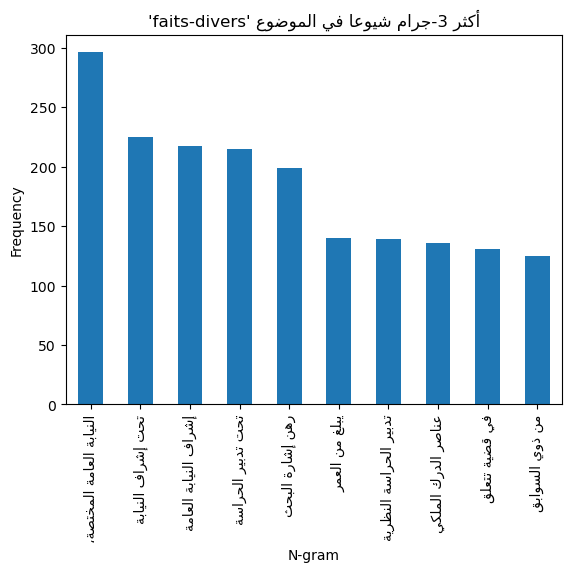

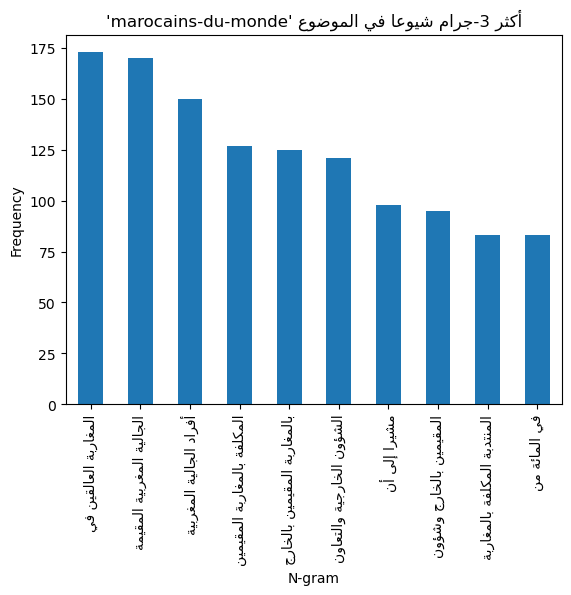

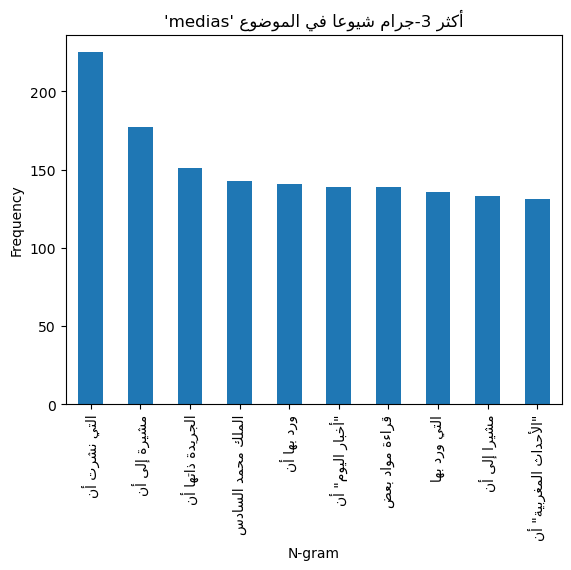

/var/folders/rl/csmzxzdd5mq7317hndkmhn_w0000gn/T/ipykernel_21548/1426393454.py:31: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.savefig(f"output/top10 ngram/{topic}_ngaram.png", bbox_inches='tight')
/Users/zahraa/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


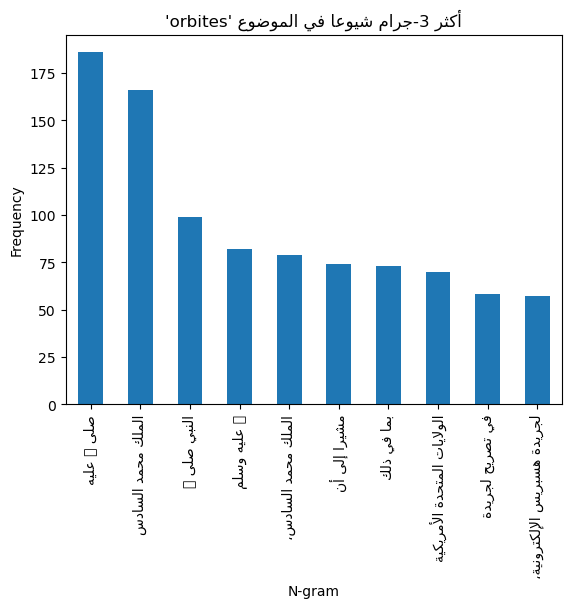

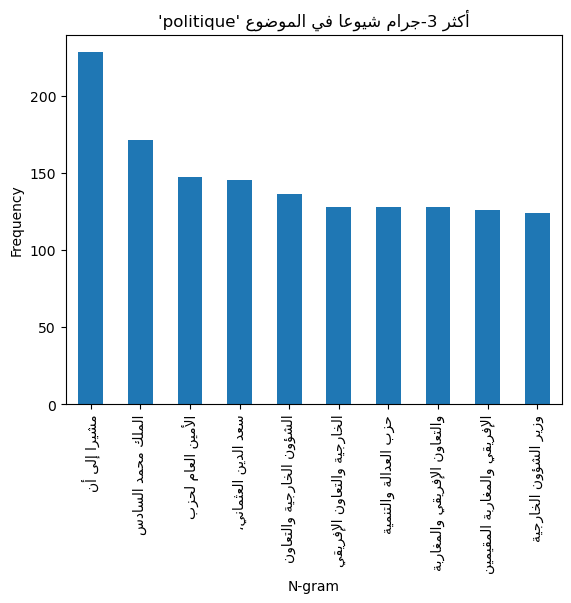

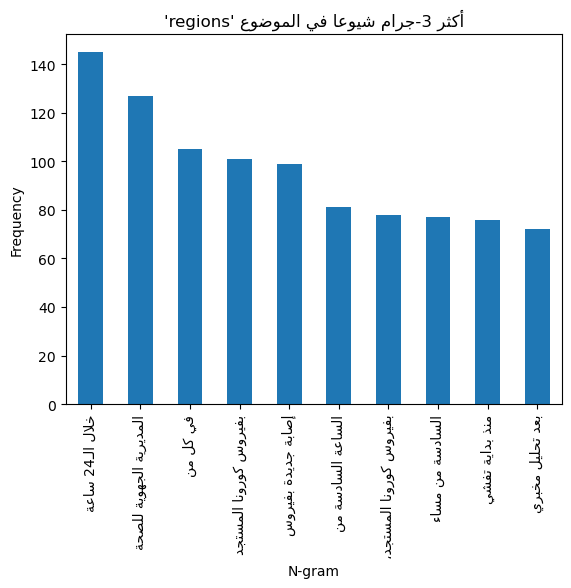

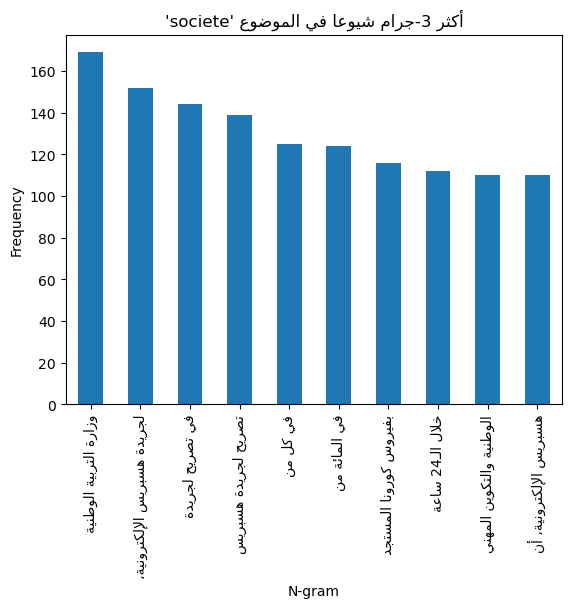

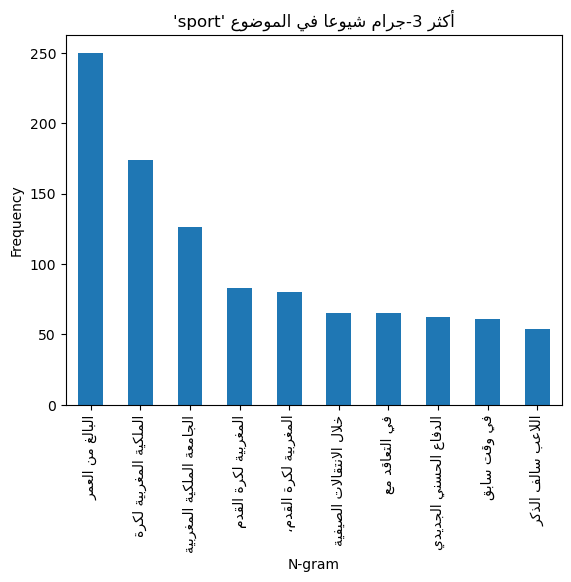

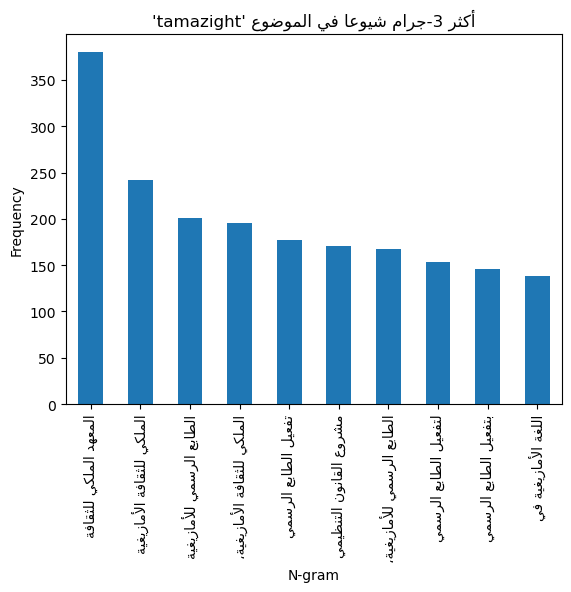

In [25]:
# Specify the length of n-grams to generate
n = 3
# Create a DataFrame with columns "topic" and "ngram_arabic" for all n-grams
df_ngrams = pd.DataFrame(columns=['topic', 'ngram_arabic'])
for topic in df['topic'].unique():
    stories = df[df['topic'] == topic]['story']
    text = ' '.join(stories)
    ngrams = list(nltk.ngrams(text.split(), n))
    ngrams = [' '.join(ngram) for ngram in ngrams]
    df_topic = pd.DataFrame({'topic': [topic] * len(ngrams), 'ngram_arabic': ngrams})
    df_ngrams = pd.concat([df_ngrams, df_topic])

# Count the frequency of each n-gram for each topic
counts = df_ngrams.groupby(['topic', 'ngram_arabic']).size()

# Select the top 10 n-grams for each topic
top_counts = counts.groupby(level=0).nlargest(10)

# Plot the top n-grams for each topic
for topic in top_counts.index.levels[0]:
    #top_ngrams = top_counts.loc[topic].index
    top_ngrams = top_counts.loc[topic].index.get_level_values(1)

    top_ngrams = top_ngrams.map(lambda x: get_display(arabic_reshaper.reshape(x)))
    fig, ax = plt.subplots()
    top_counts.loc[topic].plot(kind='bar', ax=ax)
    ax.set_title(get_display(arabic_reshaper.reshape(f"أكثر {n}-جرام شيوعًا في الموضوع '{topic}'")))
    ax.set_xticklabels(top_ngrams)
    ax.set_xlabel("N-gram")
    ax.set_ylabel("Frequency")
    plt.savefig(f"output/top10 ngram/{topic}_ngaram.png", bbox_inches='tight')
    plt.show()